## Problem Statement 
            Perform Data Cleaning 
            

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'Time series.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
#Rename Column name

df.columns = ['Month','Sales']
df.head(10)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [5]:
#dimension od dataframe

df.shape

(107, 2)

In [6]:
#null values in dataframe

df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
#dropping the null values 

df.drop(106,inplace = True)

In [9]:
df.drop(105,inplace =True)

In [10]:
df.shape

(105, 2)

In [11]:
#data type of columns

df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
#month column is object but it should be datetime  

df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
# In ML the index  is numbers 
# While in time series it should be time related 

df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [17]:
#statistical info of dataframe

df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Problem Statement 2 :
                1.Visualize your sales column 
                2.Check if data is stationary or not

<AxesSubplot:xlabel='Month'>

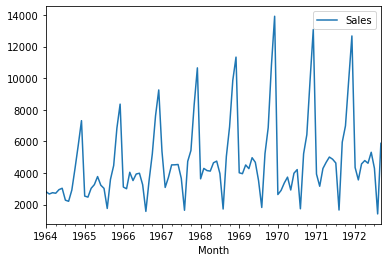

In [18]:
#visualize the sales 

df.plot()

In [19]:
# seasonal data 
# i.e in month of chistmas sales goes up & after that sales goes down

## adfuller test p-value < 0.05 ,My data  is atationary

!pip install statsmodels 

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(df['Sales'])

(-1.833593056327624,
 0.36391577166024447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
##  Hypothesis Testing 
## Null hypothesis - data is not st
## alternate hypo - data is st.

In [23]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics','p-value','Lags used','Number of obs used']
    for value,labels in zip(result,labels):
        print('{} : {} '.format(labels,value))
    if result[1] <= 0.05:
        print('Strong evidance against null hypo ,reject the null hypo & data is stationary')
    else:
        print('Weak evidance against null hypo ,accept the null hypo & data is not stationary')

In [24]:
adfuller_test(df['Sales'])

ADF test statistics : -1.833593056327624 
p-value : 0.36391577166024447 
Lags used : 11 
Number of obs used : 93 
Weak evidance against null hypo ,accept the null hypo & data is not stationary


## Problem Statement 3 :
                    1. How to make data stationary using differncing


In [25]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [26]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [27]:
df['Sales first diff'] = df['Sales'] - df['Sales'].shift(1)

In [28]:
df.head()

,Sales,Sales first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [29]:
df['Seasonal first diff'] = df['Sales'] - df['Sales'].shift(12)

In [30]:
df.head()

,Sales,Sales first diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [31]:
adfuller_test(df['Seasonal first diff'].dropna())

ADF test statistics : -7.626619157213164 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Strong evidance against null hypo ,reject the null hypo & data is stationary


<AxesSubplot:xlabel='Month'>

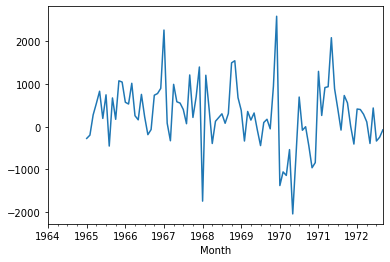

In [32]:
df['Seasonal first diff'].plot()

In [33]:
## Arima AR + I + MA
## (p,d,q)
## p - PACF graph
## d - differencing  = 1
## q - ACF graph

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [35]:
import matplotlib.pyplot as plt

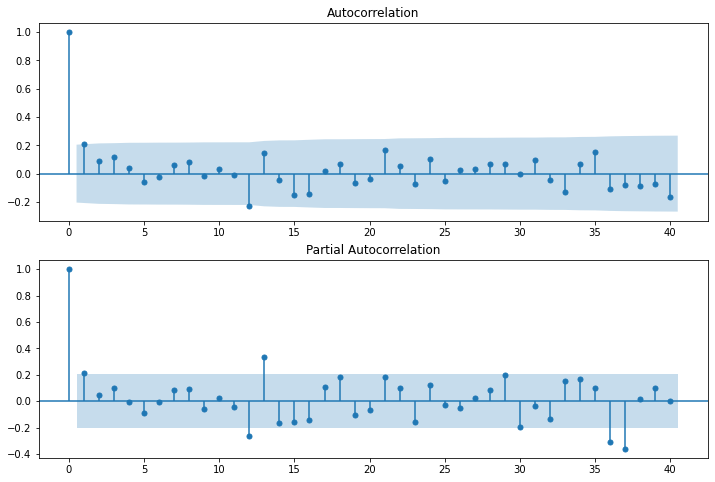

In [36]:
fig = plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff'].iloc[13:],lags = 40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff'].iloc[13:],lags = 40,ax=ax2)


In [37]:
#(p,d,q)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model = ARIMA(df['Sales'],order=(1,1,1))

C:\Users\sai\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will b

In [40]:
model = model.fit()

C:\Users\sai\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 03 Oct 2021   AIC                           1910.251
Time:                        20:02:18   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7843     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
df.shape

(105, 3)

In [43]:
df['forecast'] = model.predict(start=90,end=103,dynamic = True)

In [44]:
df.head(20)

,Sales,Sales first diff,Seasonal first diff,forecast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN


In [45]:
df.tail(20)

,Sales,Sales first diff,Seasonal first diff,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.067138
1971-08-01,1659.0,-2974.0,-79.0,218.362730
1971-09-01,5951.0,4292.0,730.0,107.732949
1971-10-01,6981.0,1030.0,557.0,59.681373


<AxesSubplot:xlabel='Month'>

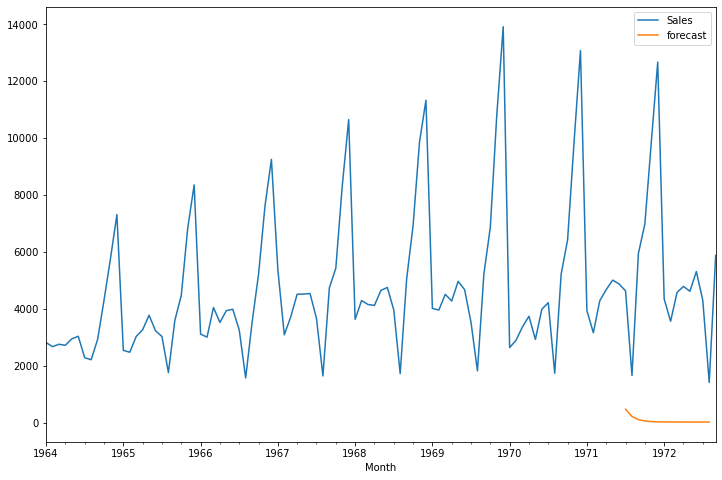

In [46]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [47]:
# seasonal data so we cant use ARIMA model 
# SARIMAX -- seasonal arima


In [48]:
import statsmodels.api as sm

In [49]:
#seasonal order = (p,d,q,shiftvalue) 

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
result = model.fit()

In [52]:
df['forecast_SERIMAX'] = result.predict(start=90,end=103,dynamic=True)

In [53]:
df.tail(20)

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SERIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.067138,4437.324643
1971-08-01,1659.0,-2974.0,-79.0,218.362730,2050.747582
1971-09-01,5951.0,4292.0,730.0,107.732949,5493.376512
1971-10-01,6981.0,1030.0,557.0,59.681373,6752.038955


<AxesSubplot:xlabel='Month'>

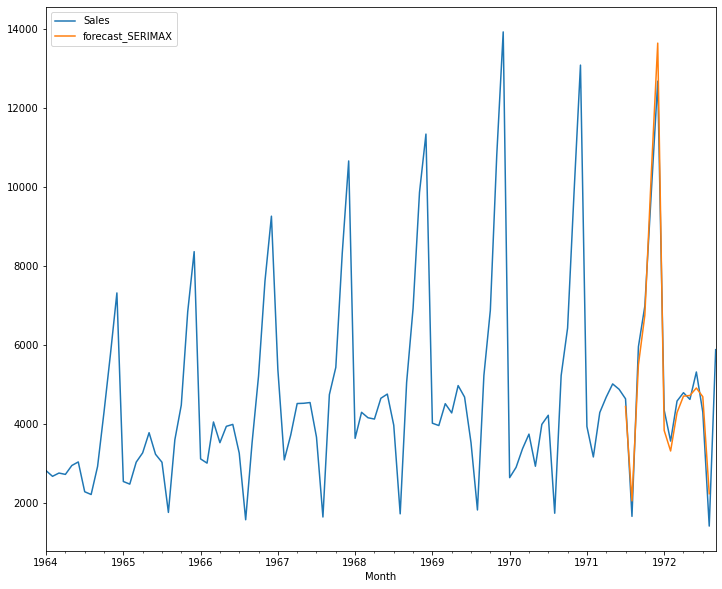

In [54]:
#Plotting the graph to check the original sales annd  serimmax

df[['Sales','forecast_SERIMAX']].plot(figsize=(12,10))

## Problem Statment 4 :


                    1. Create the Additional Dateaset & do prediction over there

In [55]:
## use dateofset to create additional dataset

In [56]:
from pandas.tseries.offsets import DateOffset
## Create Additional data for 24 month

In [57]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [58]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [59]:
future_dataset =  pd.DataFrame(index = future_dates[1:],columns=df.columns)

In [60]:
future_dataset.tail()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SERIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [61]:
future_df = pd.concat([df,future_dataset])

In [62]:
future_df.shape

(128, 5)

In [63]:
future_df['forecast_SERIMAX'] = result.predict(start=104,end=124,dynamic = True)

<AxesSubplot:>

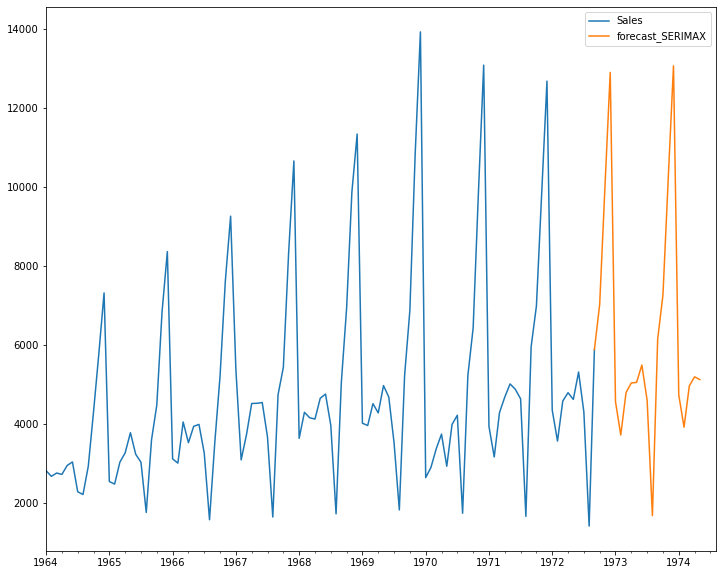

In [64]:
# this graph is with the additional data which created and its shows the proper graph using SERIMAX


future_df[['Sales','forecast_SERIMAX']].plot(figsize=(12,10))